In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

import bar_chart_race as bcr


In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")

/tmp/ipykernel_15721/1809114189.py:1: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")


In [4]:
df.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.tail()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,181689,201712310031,2017,12,31,NaN,0,NaN,92,India,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:

select_columns = """success 
suicide 
attacktype1
attacktype1_txt 
targtype1_txt 
targsubtype1_txt 
target1 
natlty1_txt 
gname 
gsubname 
nperps 
weaptype1_txt 
weapsubtype1_txt 
nkill
nkillus """

In [7]:
df.columns.all

<bound method Index.all of Index(['Unnamed: 0', 'eventid', 'iyear', 'imonth', 'iday', 'approxdate',
       'extended', 'resolution', 'country', 'country_txt',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=136)>

In [8]:
print(df.columns.tolist())


['Unnamed: 0', 'eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claim

In [9]:
['iyear', 'country_txt', 'region_txt', 'latitude', 'longitude', 'weaptype1']

['iyear', 'country_txt', 'region_txt', 'latitude', 'longitude', 'weaptype1']

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [11]:
df.tail()


,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN

### Question 1: How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?

In [13]:
df2 = df.groupby(['iyear'], as_index=True).count()[['eventid']]


<Axes: title={'center': 'Number of attacks per year (1970-2017)'}, xlabel='Year', ylabel='Number of attacks'>

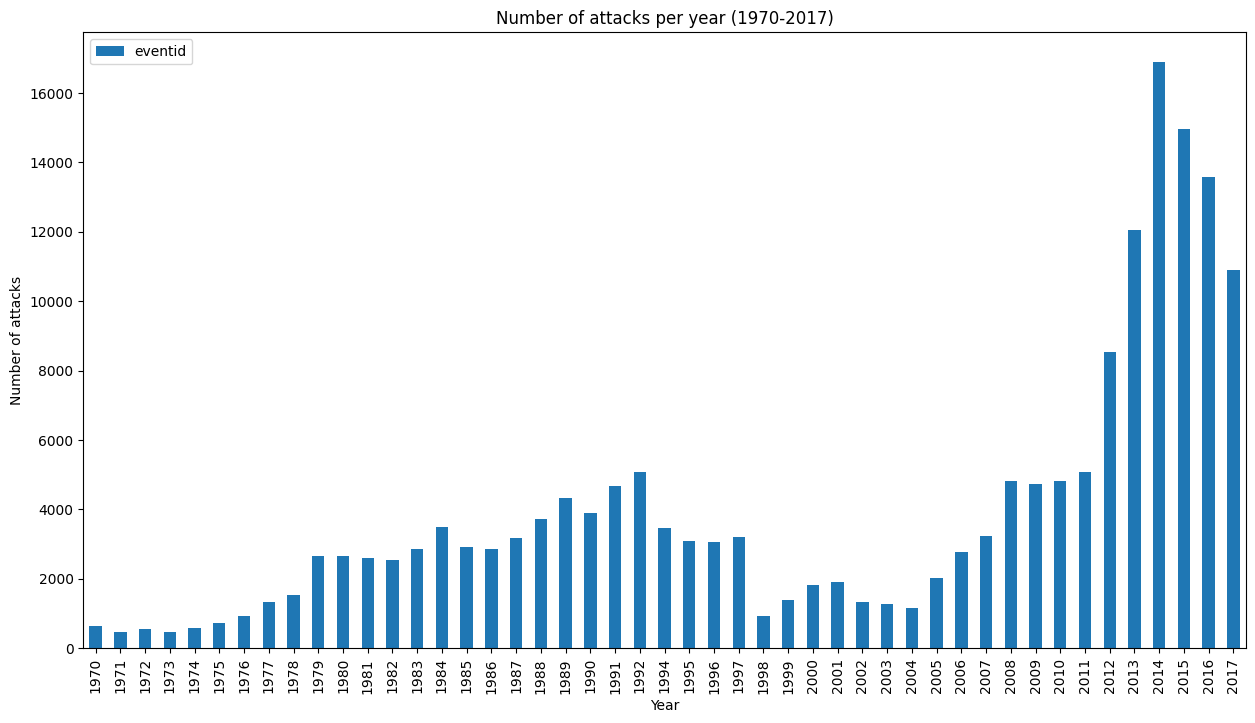

In [14]:
df2.plot.bar(xlabel='Year', ylabel='Number of attacks', title='Number of attacks per year (1970-2017)', figsize=(15, 8))

In [15]:
df.region_txt.unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [16]:
df3 = df[['region_txt', 'iyear', 'eventid', 'nkill']].groupby(['region_txt', 'iyear']).agg({'eventid':'count', 'nkill':'sum'})

In [17]:
df3.index.levels[0].unique()

Index(['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia',
       'East Asia', 'Eastern Europe', 'Middle East & North Africa',
       'North America', 'South America', 'South Asia', 'Southeast Asia',
       'Sub-Saharan Africa', 'Western Europe'],
      dtype='object', name='region_txt')

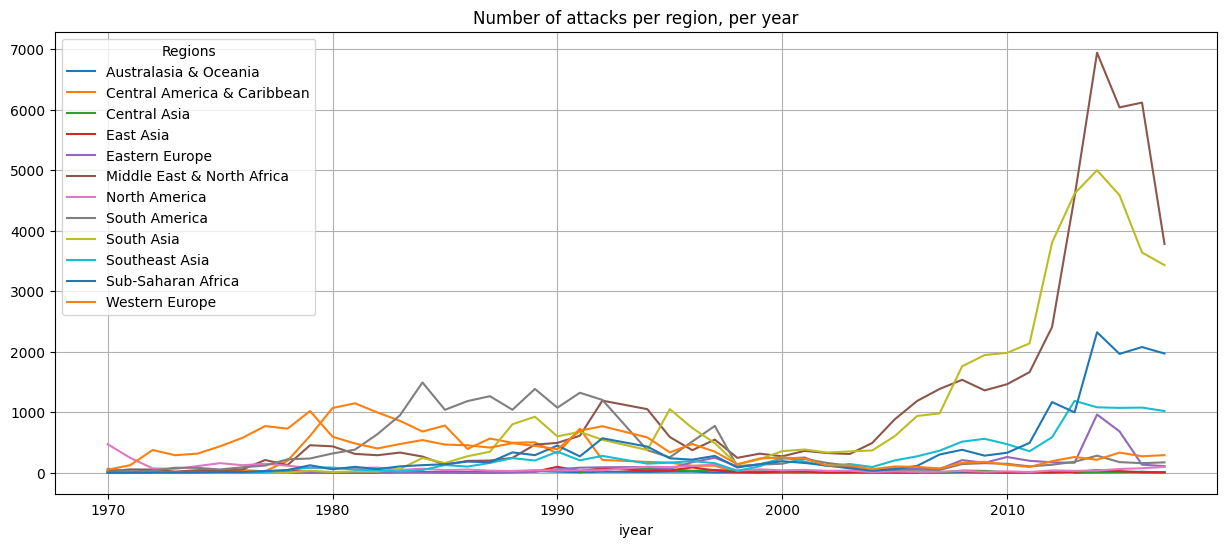

In [19]:
df3.unstack(level=0)['eventid'].plot(kind='line', figsize=(15, 6), grid=True)
plt.legend(title='Regions')
plt.title('Number of attacks per region, per year')

# show the graph
plt.show()

In [20]:
df3.unstack(level=0).head(15)

eventid                                            
region_txt Australasia & Oceania Central America & Caribbean Central Asia   
iyear                                                                       
1970                         1.0                         7.0          NaN  \
1971                         1.0                         5.0          NaN   
1972                         8.0                         3.0          NaN   
1973                         1.0                         6.0          NaN   
1974                         1.0                        11.0          NaN   
1975                         NaN                         9.0          NaN   
1976                         NaN                        45.0          NaN   
1977                         NaN                        24.0          NaN   
1978                         2.0                       199.0          NaN   
1979                         2.0                       609.0          NaN   
1980                         7.0                      1070.0          NaN   
1981                         3.0                      1148.0          NaN   
1982                         2.0                       996.0          NaN   
1983                         NaN                       858.0          NaN   
1984                        11.0                       681.0          NaN   

                                                                               
region_txt East Asia Eastern Europe Middle East & North Africa North America   
iyear                                                                          
1970             2.0           12.0                       28.0         472.0  \
1971             1.0            5.0                       55.0         247.0   
1972             NaN            1.0                       53.0          73.0   
1973             2.0            1.0                       19.0          64.0   
1974             4.0            2.0                       42.0         111.0   
1975            12.0            NaN                       44.0         159.0   
1976             2.0            NaN                       55.0         125.0   
1977             4.0            2.0                      211.0         149.0   
1978            35.0            2.0                      128.0         117.0   
1979            16.0            1.0                      455.0          79.0   
1980             1.0            1.0                      437.0          75.0   
1981             4.0            4.0                      312.0          77.0   
1982             3.0            3.0                      290.0          86.0   
1983            13.0            2.0                      334.0          47.0   
1984            15.0            4.0                      268.0          67.0   

                                                                        
region_txt South America South Asia Southeast Asia Sub-Saharan Africa   
iyear                                                                   
1970                65.0        1.0           10.0                3.0  \
1971                24.0        NaN            6.0                2.0   
1972                33.0        1.0           16.0                4.0   
1973                83.0        1.0            2.0                4.0   
1974                81.0        2.0            3.0                7.0   
1975                55.0        4.0            7.0               12.0   
1976                91.0        4.0           12.0               11.0   
1977               119.0        2.0            8.0               29.0   
1978               222.0        2.0           44.0               46.0   
1979               236.0       34.0           86.0              124.0   
1980               319.0       12.0           87.0               58.0   
1981               383.0       23.0           50.0               98.0   
1982               639.0       20.0           43.0               60.0   
1983               950.0     

In [21]:
df3.tail(19)
#df3.loc['East Asia',2000][0]
df3.loc['Western Europe', 2000]['eventid']

253.0

In [22]:
df3.loc['Western Europe', 2000]['eventid']

253.0

In [23]:
# pretty sure there's a more elegant way to produce the below table, using .pivot_table
df4 = pd.DataFrame(index=df.iyear.unique(), columns=df.region_txt.unique())

In [24]:
df4.head()

,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,South America,Eastern Europe,Sub-Saharan Africa,Middle East & North Africa,Australasia & Oceania,South Asia,Central Asia
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for col in df4.columns:
    for ind in df4.index:
        try:
            df4.loc[ind][col] = df3.loc[col, ind]['eventid']
        except:
            df4.loc[ind][col]  = 0

In [26]:
df4.head(15)

,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,South America,Eastern Europe,Sub-Saharan Africa,Middle East & North Africa,Australasia & Oceania,South Asia,Central Asia
1970,7.0,472.0,10.0,50.0,2.0,65.0,12.0,3.0,28.0,1.0,1.0,0
1971,5.0,247.0,6.0,125.0,1.0,24.0,5.0,2.0,55.0,1.0,0,0
1972,3.0,73.0,16.0,376.0,0,33.0,1.0,4.0,53.0,8.0,1.0,0
1973,6.0,64.0,2.0,290.0,2.0,83.0,1.0,4.0,19.0,1.0,1.0,0
1974,11.0,111.0,3.0,317.0,4.0,81.0,2.0,7.0,42.0,1.0,2.0,0
1975,9.0,159.0,7.0,438.0,12.0,55.0,0,12.0,44.0,0,4.0,0
1976,45.0,125.0,12.0,578.0,2.0,91.0,0,11.0,55.0,0,4.0,0
1977,24.0,149.0,8.0,771.0,4.0,119.0,2.0,29.0,211.0,0,2.0,0
1978,199.0,117.0,44.0,729.0,35.0,222.0,2.0,46.0,128.0,2.0,2.0,0
1979,609.0,79.0,86.0,1020.0,16.0,236.0,1.0,124.0,455.0,2.0,34.0,0


In [27]:
def add_row_mean(df):
    # compute row-wise mean
    glob_mean = df.mean(axis=1)
    # add new column to DataFrame
    df['global_mean'] = glob_mean


In [28]:
add_row_mean(df4)

In [29]:
df4.sort_index().tail(15)

,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,South America,Eastern Europe,Sub-Saharan Africa,Middle East & North Africa,Australasia & Oceania,South Asia,Central Asia,global_mean
2003,8.0,34.0,145.0,121.0,6.0,117.0,100.0,73.0,310.0,4.0,353.0,7.0,106.5
2004,5.0,12.0,95.0,59.0,4.0,42.0,46.0,34.0,492.0,0,369.0,8.0,97.166667
2005,3.0,22.0,204.0,104.0,2.0,49.0,76.0,60.0,882.0,0,604.0,11.0,168.083333
2006,5.0,15.0,272.0,98.0,1.0,50.0,70.0,114.0,1187.0,2.0,938.0,6.0,229.833333
2007,4.0,18.0,365.0,72.0,0,47.0,62.0,302.0,1385.0,1.0,982.0,4.0,270.166667
2008,0,31.0,514.0,163.0,25.0,144.0,209.0,380.0,1536.0,8.0,1759.0,36.0,400.416667
2009,9.0,16.0,561.0,182.0,8.0,159.0,165.0,283.0,1361.0,1.0,1945.0,31.0,393.416667
2010,1.0,24.0,473.0,133.0,1.0,148.0,261.0,331.0,1463.0,1.0,1981.0,9.0,402.166667
2011,1.0,12.0,356.0,95.0,4.0,106.0,198.0,494.0,1663.0,0,2138.0,9.0,423.0
2012,1.0,39.0,587.0,193.0,4.0,133.0,173.0,1168.0,2409.0,0,3803.0,12.0,710.166667


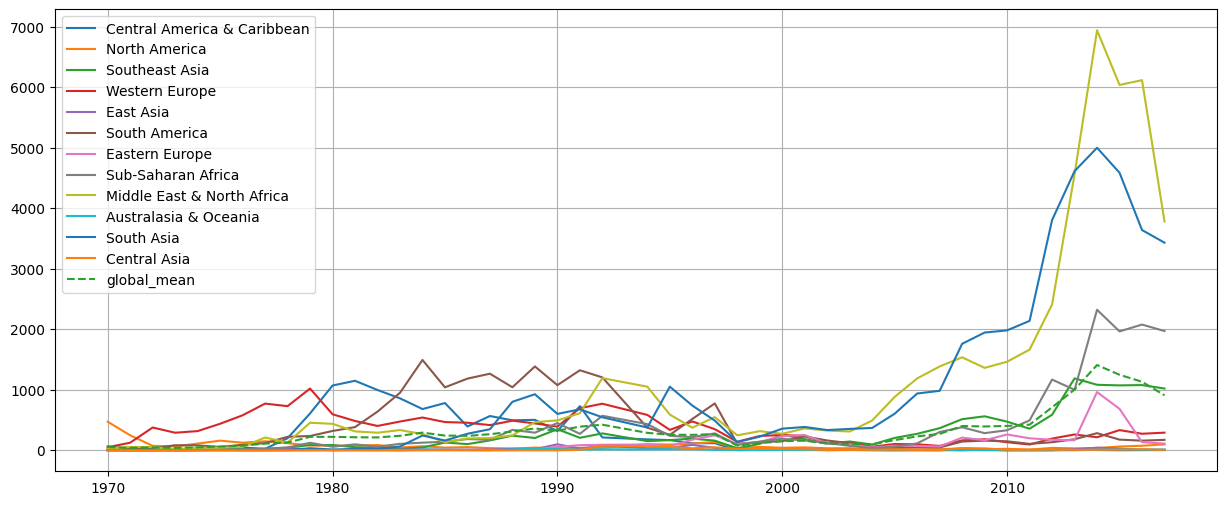

In [30]:
df4 = df4.sort_index()
df4.plot(figsize=(15, 6), grid=True, style=['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '--'])
plt.show()

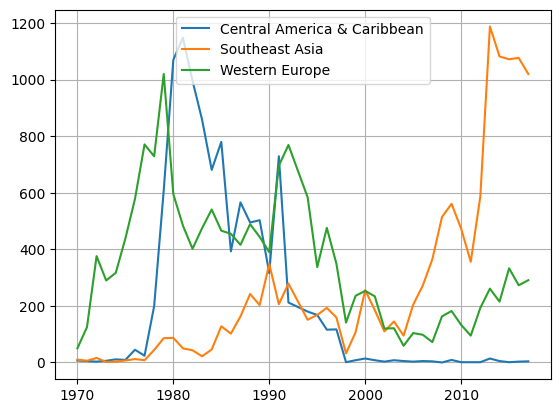

In [31]:
df4[['Central America & Caribbean', 'Southeast Asia', 'Western Europe']].plot(grid=True)
plt.show()

In [32]:
df4.index.name = 'year'
df_race = df4.apply(pd.to_numeric, errors='coerce', axis=1)


In [61]:
cumulative_attacks_df = df_race.cumsum()

In [63]:
# Race Bar Chart to better show the change in attacks numbers over the years for different regions

bcr.bar_chart_race(df=cumulative_attacks_df, filename=None,
                    period_length=1000, 
                    title="Cumulative count of terrorist attacks per region (1970 and 2017)",  
                    perpendicular_bar_func='median')

/home/tk/Dev/terrorism_ds/venv/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/home/tk/Dev/terrorism_ds/venv/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



##### Question 1:

A: Overall, there has been an increase in the number of attacks in the last 20 years. Before 1997, South Asia, Western Europe and South America had the most attacks. There was never more than 1500 in any of those regions though. Around 2001, South Asia started having more attacks, however the standout regions is by far the Middle East and North Africa. 2014 experienced the most attacks in a single region, and was the most active year for terrorist attacks. Sub-Saharn Africa started climbing above the global average around 2011. It's most active year was also 2014.

### Question 2: Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?



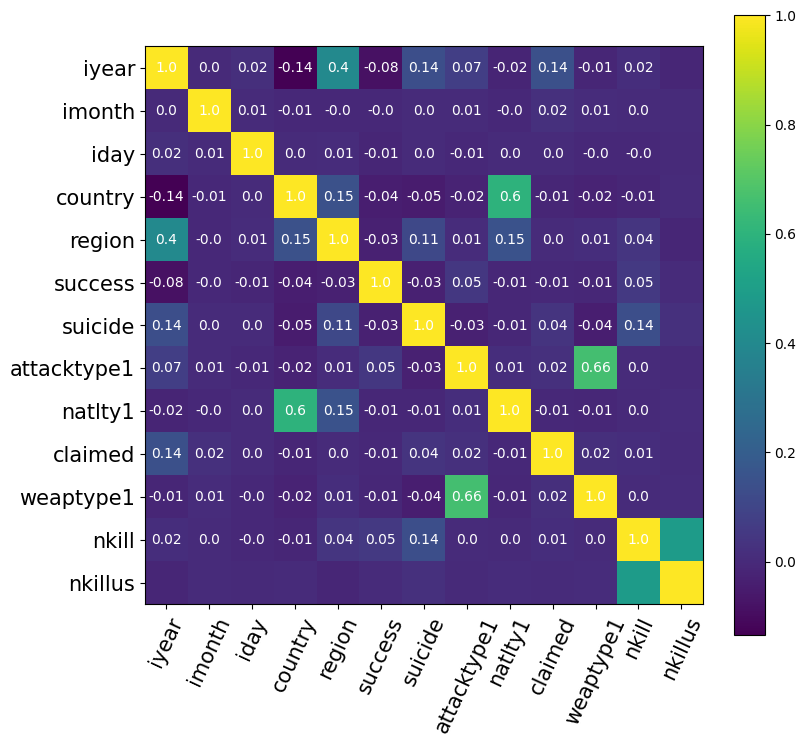

In [34]:
columns_of_interest = df[['iyear', 'imonth', 'iday', 'country', 'region', 'success', 'suicide', 'attacktype1', 'natlty1', 'claimed', 'weaptype1', 'nkill', 'nkillus']]
df_corr = df[['iyear', 'imonth', 'iday', 'country', 'region', 'success', 'suicide', 'attacktype1', 'natlty1', 'claimed', 'weaptype1', 'nkill', 'nkillus']].corr()

fig, ax = plt.subplots(figsize=(8,10))
im = ax.imshow(df_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

# Show all ticks and label them with the dataframe column name
ax.set_xticks(np.arange(len(columns_of_interest.columns)))
ax.set_yticks(np.arange(len(columns_of_interest.columns)))

ax.set_xticklabels(columns_of_interest.columns, rotation=65, fontsize=15)
ax.set_yticklabels(columns_of_interest.columns, rotation=0, fontsize=15)

# Loop over data dimensions and create text annotations
for i in range(len(columns_of_interest.columns)-1):
    for j in range(len(columns_of_interest.columns)-1):
        text = ax.text(j, i, round(df_corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="white")

plt.show()

Most of the categories are not correlated at all. Almost all of them have -0.15 <x> 0.15 as their correlation coefficients. 
Some obvious relationships are nationality vs country, and weapon type vs attack type.

An interesting, but explained, pair is the year vs region correlation. As seen in the above line graphs of number of attacks per region over time, certain periods have terrorist attacks in concentrated regions. This could be linked to wars and civil unrest in those areas. So based on the period in time, one could, to a small degree of confidence, guess what region in the world had the most terrorist attacks. 

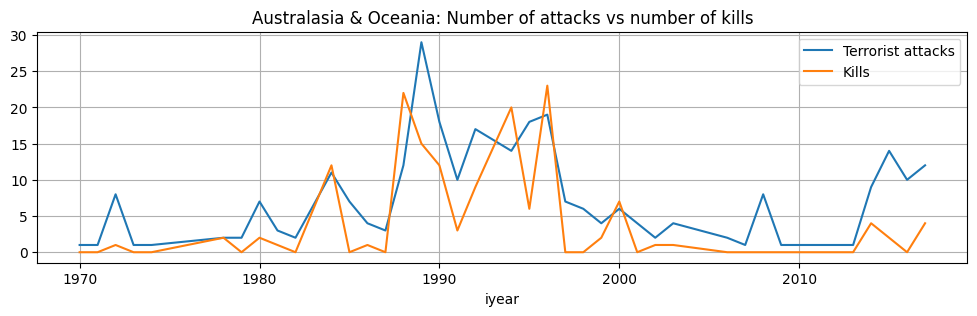

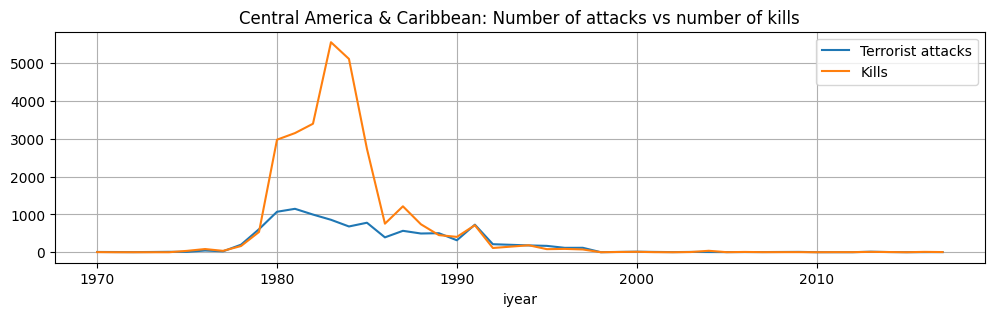

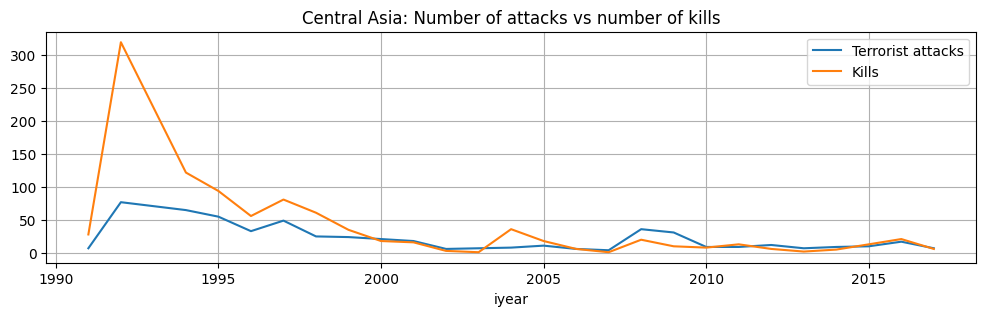

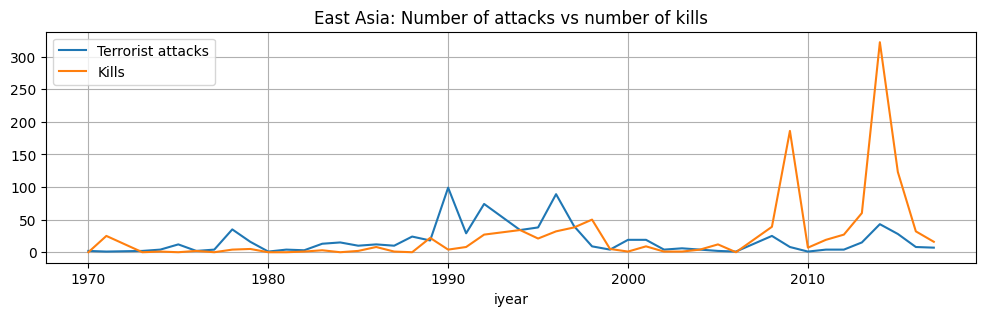

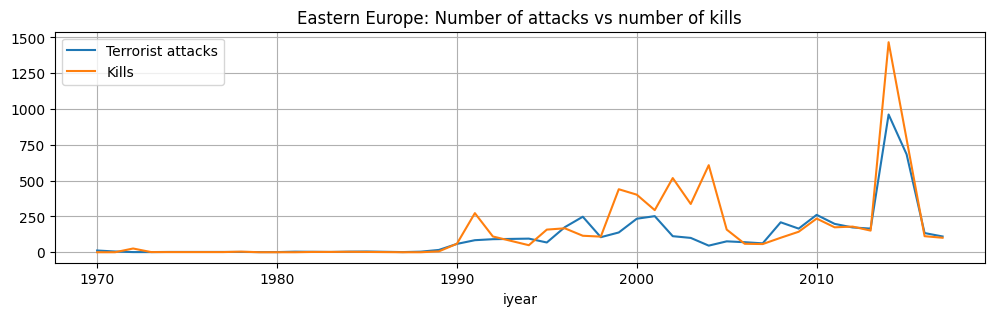

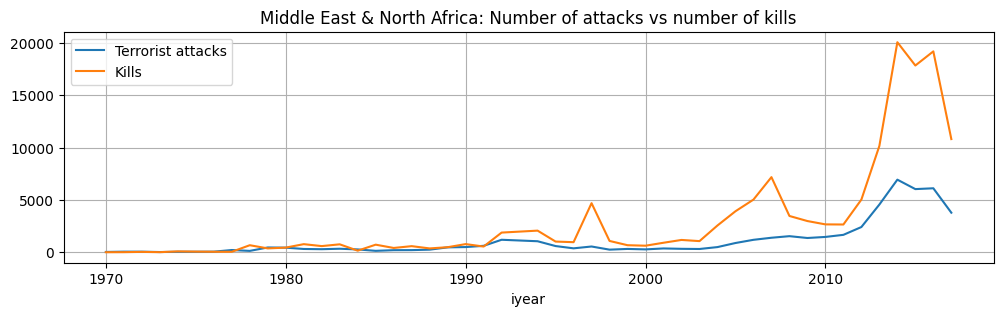

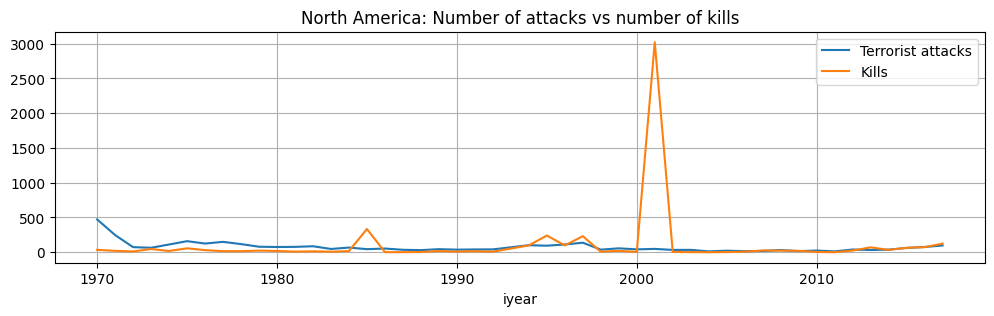

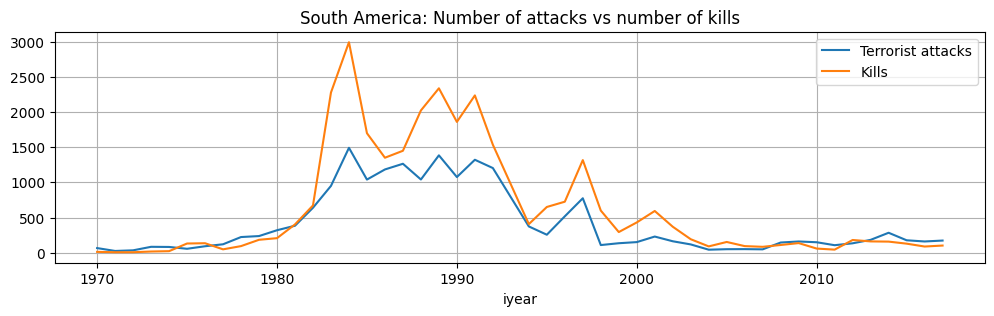

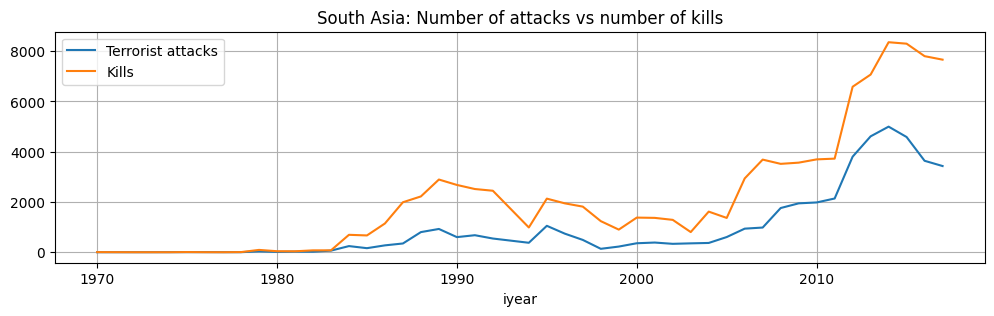

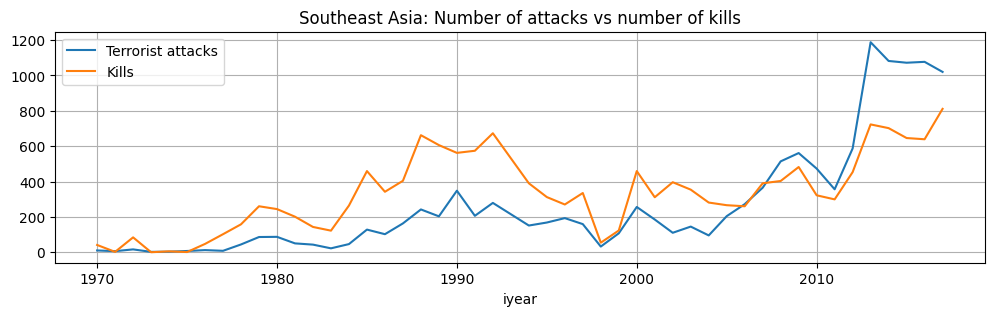

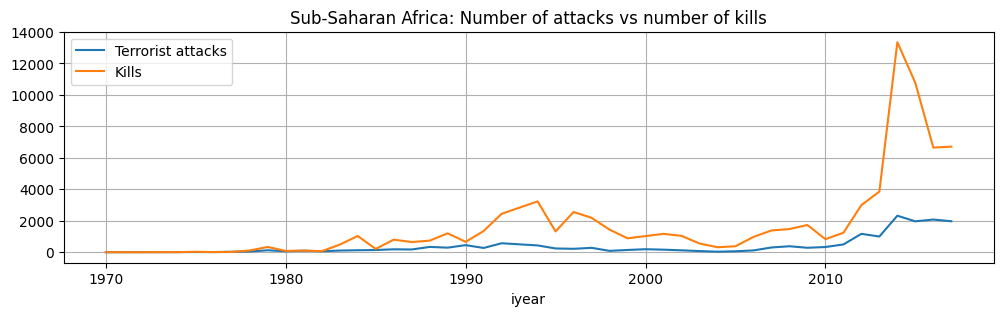

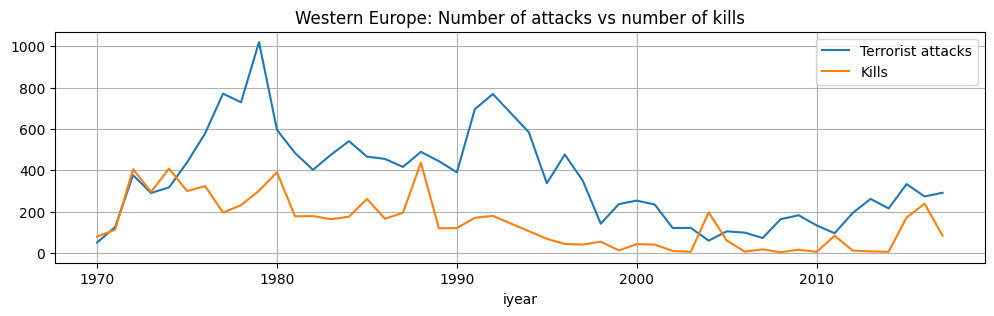

In [35]:
for region in df3.index.levels[0]:
    df3.loc[region, :].plot(grid=True, figsize=(12, 3))
    plt.title(f"{region}: Number of attacks vs number of kills")
    plt.legend(['Terrorist attacks', 'Kills'])

In [36]:
# df3.head(15)

correlation_df = pd.DataFrame(index=df3.index.levels[0], columns=['Correlation'])

for region in df3.index.levels[0]:
    correlation_df.loc[region]['Correlation'] = df3.loc[region, :]['eventid'].corr(df3.loc[region, :]['nkill'])

correlation_df.sort_values(['Correlation'], ascending=False) 


,Correlation
region_txt,
Middle East & North Africa,0.973521
South Asia,0.966784
South America,0.947857
Sub-Saharan Africa,0.935765
Eastern Europe,0.870707
Central Asia,0.845711
Central America & Caribbean,0.828395
Southeast Asia,0.764637
Australasia & Oceania,0.728608


In [37]:
# I'm going to use the approach that a value is an outlier if it is more that 1 std deviation from the median, 
# and an extreme outlier is a value more than 2 std deviation away for the median

std_deviation = correlation_df['Correlation'].std()
median = correlation_df['Correlation'].median()

correlation_df['is_outlier'] = correlation_df['Correlation'] < median - std_deviation 
correlation_df['is_extreme_outlier'] = correlation_df['Correlation'] < median - 2*std_deviation 



In [38]:
median

0.8370533159162776

In [39]:
correlation_df

,Correlation,is_outlier,is_extreme_outlier
region_txt,,,
Australasia & Oceania,0.728608,False,False
Central America & Caribbean,0.828395,False,False
Central Asia,0.845711,False,False
East Asia,0.201394,True,False
Eastern Europe,0.870707,False,False
Middle East & North Africa,0.973521,False,False
North America,-0.029875,True,True
South America,0.947857,False,False
South Asia,0.966784,False,False


##### Question 2: Answer

The correlation_df median is 0.83
This means that there is very high correlation between the number of terrorist attacks in a region, and the number of confirmed deaths due to the attacks.
Outliers are East Asia and North America, with North America being the only extreme outlier. It actually has a negative, albeit neglegible correlation between its attack number and number of kills.

## Question 3: What are the most common methods of attacks? Does it differ in various regions or in time?

Answer: The most common methods of attacks are bombings and armed assualt. Almost all regions have bombings in their top 2 attack types, throughout 1970-2017, the prefered terrorist attack type is explosions.  

In [40]:
attack_type_count_df = df[['iyear', 'attacktype1_txt', 'eventid']].groupby(['iyear', 'attacktype1_txt']).count().sort_values(['iyear', 'eventid'], ascending=[True, False])

In [41]:
attack_type_count_df.head(20)

eventid
iyear attacktype1_txt                             
1970  Bombing/Explosion                        333
      Facility/Infrastructure Attack           174
      Armed Assault                             61
      Hostage Taking (Kidnapping)               38
      Assassination                             22
      Hijacking                                 11
      Unknown                                    6
      Hostage Taking (Barricade Incident)        3
      Unarmed Assault                            3
1971  Bombing/Explosion                        239
      Facility/Infrastructure Attack            88
      Assassination                             70
      Armed Assault                             44
      Hostage Taking (Kidnapping)               20
      Hijacking                                  6
      Unknown                                    3
      Hostage Taking (Barricade Incident)        1
1972  Assassination                            265
      Bombing/Explosion                        188
      Armed Assault                             63

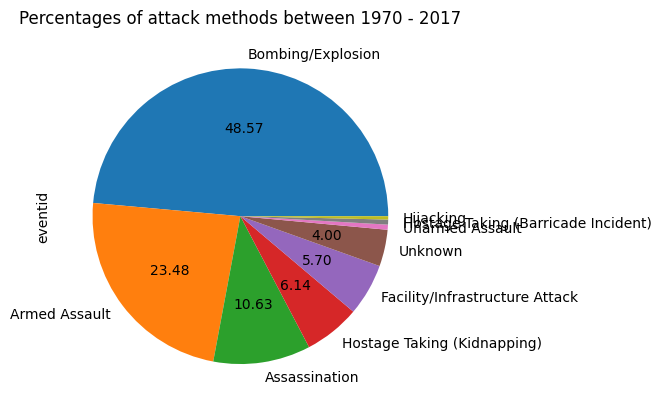

In [42]:
df[['attacktype1_txt', 'eventid']].groupby(['attacktype1_txt']).count().sort_values(['eventid'], ascending=False).plot.pie(subplots=True,
  autopct=lambda p: format(p, '.2f') if p > 4 else None)                          
plt.legend().remove()
plt.title("Percentages of attack methods between 1970 - 2017")
plt.show()

In [43]:
attack_type_count_df.index.levels[0]
overtime = pd.DataFrame(index=list(attack_type_count_df.index.levels[0]),
                                   columns=[['Top Attack Type', 'Amount']])

In [44]:
for i in list(attack_type_count_df.index.levels[0]):
    # populate Amount column with top value for each year
    overtime.loc[i]['Amount'] = attack_type_count_df.loc[i].max()['eventid']

    # populate top type of attack for each year
    overtime.loc[i]['Top Attack Type'] = attack_type_count_df.loc[i].iloc[0].name
    

In [45]:
overtime.head(20)

,Top Attack Type,Amount
1970,Bombing/Explosion,333
1971,Bombing/Explosion,239
1972,Assassination,265
1973,Assassination,164
1974,Bombing/Explosion,285
1975,Bombing/Explosion,370
1976,Bombing/Explosion,419
1977,Bombing/Explosion,635
1978,Bombing/Explosion,644
1979,Bombing/Explosion,1058


In [46]:
attack_type_count_regions = df[['region_txt', 'attacktype1_txt', 'eventid']].groupby(['region_txt', 'attacktype1_txt']).count().sort_values(['region_txt', 'eventid'], ascending=[True, False])

In [47]:
attack_type_count_regions.head(20)

eventid
region_txt                  attacktype1_txt                             
Australasia & Oceania       Bombing/Explosion                         75
                            Facility/Infrastructure Attack            71
                            Armed Assault                             51
                            Assassination                             36
                            Unknown                                   16
                            Hostage Taking (Kidnapping)               13
                            Unarmed Assault                           11
                            Hostage Taking (Barricade Incident)        6
                            Hijacking                                  3
Central America & Caribbean Armed Assault                           4361
                            Bombing/Explosion                       3239
                            Assassination                           1254
                            Hostage Taking (Kidnapping)              501
                            Facility/Infrastructure Attack           403
                            Unknown                                  354
                            Hostage Taking (Barricade Incident)      187
                            Hijacking                                 26
                            Unarmed Assault                           19
Central Asia                Bombing/Explosion                        235
                            Armed Assault                            116

##### Q3 Answer:
The most common methods of attack are overwhelmingly Bombings and Exposions. Almost 50% of all terrorist attacks in between 1970 - 2017. 
45 out of the 47 years in the study(96%) have bombings as the most common attack type, and the 2 years where the attack types aren't bombings also have the least amount of top attacks of all the years. 
Regarding terms of regions, 5/6 regions have bombings as their most common attack type. Central America & The Caribbean have Armed Assault as its most common type, with bombings coming in second. 

I imagine bombings/explosions are the prefered method of attack due to the efficacy of it, and that one can execute the attack/s remotely. 

### Question 4: Plot the locations of attacks on a map to visualize their regional spread

In [48]:
locations_df = df[['iyear', 'country_txt', 'region_txt', 'latitude', 'longitude', 'weaptype1_txt']]
locations_df.head(10)

,iyear,country_txt,region_txt,latitude,longitude,weaptype1_txt
0,1970,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,Unknown
1,1970,Mexico,North America,19.371887,-99.086624,Unknown
2,1970,Philippines,Southeast Asia,15.478598,120.599741,Unknown
3,1970,Greece,Western Europe,37.997490,23.762728,Explosives
4,1970,Japan,East Asia,33.580412,130.396361,Incendiary
5,1970,United States,North America,37.005105,-89.176269,Firearms
6,1970,Uruguay,South America,-34.891151,-56.187214,Firearms
7,1970,United States,North America,37.791927,-122.225906,Explosives
8,1970,United States,North America,43.076592,-89.412488,Incendiary
9,1970,United States,North America,43.072950,-89.386694,Incendiary


In [58]:
fig = px.scatter_geo(df.head(50),lat='latitude',lon='longitude', symbol='region_txt',
                     hover_name="country_txt",
                     hover_data=['weaptype1_txt', 'region_txt'])
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()